<a href="https://colab.research.google.com/github/pacomm5/PLANTILLAS2/blob/main/CHURN_MODEL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle update # instalamos kaggle. 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# antes de nada subimos en temporal kaggle.json. OJO CON ESTO QUE NO ME ENTERO. tengo que subirlo en google colaborate. en la parte izquierda me pongo en la carpeta y en la flecha de subir.
# posteriormente elijo el archivo json del ordenador y lo subo. 
!mkdir -p ~/.kaggle # creamos el provisional directorio de kaggle. 

In [3]:
! cp kaggle.json ~/.kaggle/ # llevamos el archivo al directorio creado.

In [4]:
! chmod 600 ~/.kaggle/kaggle.json # le damos permios para acceder. 

In [5]:
# importante en kaggle me tengo que poner en dataset y buscar lo que necesito. si lo encuentro tengo que poner despúes de download por ejemplo
# en este caso pone esto https://www.kaggle.com/datasets/hellbuoy/car-price-prediction y que lo que debo poner después de download es a partir de hellbuoy
! kaggle datasets download barelydedicated/bank-customer-churn-modeling
# aqui es cuando no es competición e igualmente solo tenemos que meter después del download lo siguiente “https://www.kaggle.com/arenagrenade/the-complete-pokemon-images-data-set”
# arenagrenade/the-complete-pokemon-images-data-set”

  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 85.0MB/s]


In [6]:
# si los archivos vienen en zip se abren de la siguiente manera. 
import zipfile # importamos esta librería
datazip = zipfile.ZipFile("/content/bank-customer-churn-modeling.zip") # esta es la dirección donde esta el zip
datazip.extract("Churn_Modelling.csv","/content/" ) # tenemos que hacer esto para extraer solo uno. 
# a partir de este momento ya lo tenemos en temporal. 


'/content/Churn_Modelling.csv'

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten,  BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU

In [8]:
bank_df = pd.read_csv('/content/Churn_Modelling.csv')
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
bank_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
bank_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [12]:
X = bank_df.iloc[:, 3:13].values # DATOS DE ENTRADA
y = bank_df.iloc[:, 13].values # VARIABLE OBJETIVO

- tenemso dos variables categoricas. las tenemos que cambiar a numericas. 
- aqui lo vamos a hacer así. 

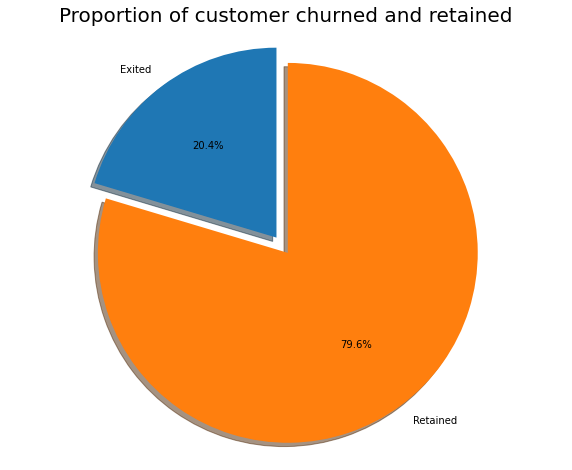

In [14]:
labels = 'Exited', 'Retained'
sizes = [bank_df.Exited[bank_df['Exited']==1].count(), bank_df.Exited[bank_df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [24]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1]) # este es el custormer geografica
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2]) # este es el genero

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
[('one_hot_encoder', OneHotEncoder(categories='auto'), [1])],
remainder='passthrough')
X = ct.fit_transform(X)
X = X[:, 1:]

In [26]:
# dividing features into training and testing sets.
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size
                                           = 0.2, random_state = 0)

In [27]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [28]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

- ahora lo que vamos a hacer es una red neuronal con diferentes capas ocultas

In [29]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes, input_dim=Xtrain.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss = 'binary_crossentropy',
                                       metrics=['accuracy'])
    return model
model=KerasClassifier(build_fn=create_model, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


-Aquí, hemos dado diferentes números de capas y funciones de activación para elegir la mejor como parte de GridSearchCV.

In [30]:
layers = [[15], [35, 25], [40, 25, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers = layers, activation = activations,
                  batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)

-En el siguiente paso, estamos entrenando el modelo y obteniendo los mejores parámetros.

In [31]:
grid_result = grid.fit(Xtrain, ytrain)